# WEB ESCRAPING


Pasos:
1.   URL   (semilla)
2.   Request (Realizar requerimiento)
3.   Response (Obtener una respuesta)
4.   Populate items   (Obtener la informacion que deseo desde response)
5.   more URLs   (ir a mas URLs)

Tipos de web scraping:

1.   Una sola pagina web
     librerias:
        - scrapy.spiders.Spider
        - selenium
        - beautiful soup
2.   Varias paginas web
      librerias:
        - scrapy.spiders.CrawlSpider
          * Crawling vertical
          * Crawling horizontal


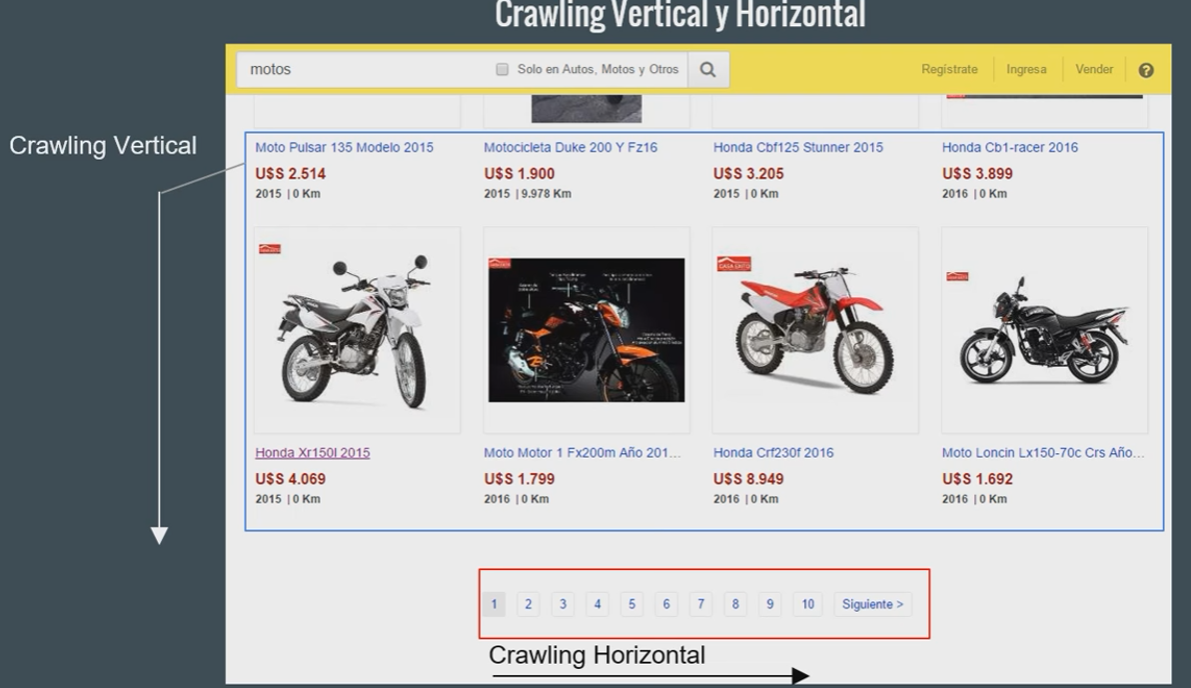

# WEB SCRAPING BÁSICO - BEAUTIFUL-SOUP

##IMPORTAR LIBRERIAS

In [ ]:
from bs4 import BeautifulSoup #libreria para hacer web scraping
import requests #libreria para envias solicitudes a las paginas web

## REALIZAR CONEXION CON EL SITIO WEB Y OBTENER UNA RESPUESTA(DOC HTML)

In [ ]:
website = 'https://subslikescript.com/movie/Titanic-120338' # url del sitio web
result = requests.get(website) # eviar solicitud y luego almacenar respuesta en una variable

content = result.text # (obten el texto de result) y almacenar el contenido 

# localizar elementos en una pagina web
soup = BeautifulSoup(content, 'lxml') # (contenido, parser)
print(soup.prettify()) # prettyfy() muestra los datos más esteticos

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-120598793-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-120598793-1');
  </script>
  <meta charset="utf-8"/>
  <title>
   Titanic (1997) Movie Script  | Subs like Script
  </title>
  <meta content="Read Titanic Movie Script. Created from srt subtitles. " name="description"/>
  <meta content="transcript, movie, subtitles, scripts, film, video, media, subs, srt " name="keywords"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="index, follow" name="robots"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/styles/main.css" media="all" rel="stylesheet" type="text/css"/>
  <script async="" data-ad-client="ca-pub-6250492176235895" src="https

## IDENTIFICAMOS LA ETIQUETA OBJETIVO QUE CONTIENE LOS DATOS A EXTRAER

EN NUESTRO CASO SE ENCUENTRA DENTRO DE 'ARTICLE'

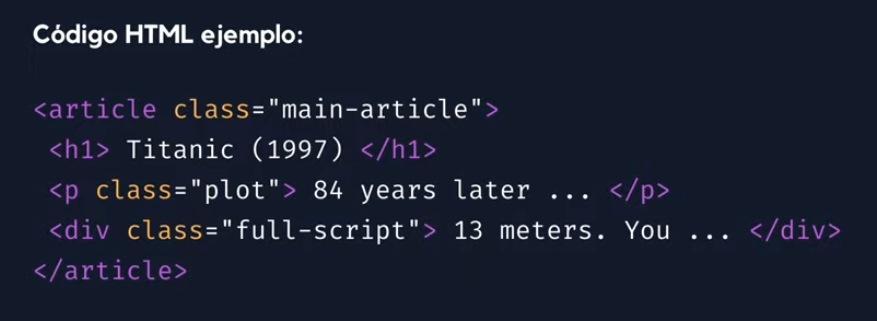

## IDENTIFICAR EN LA PAG WEB DENTRO DE QUE ETIQUETA SE ENCUENTRA  EL CONTENIDO

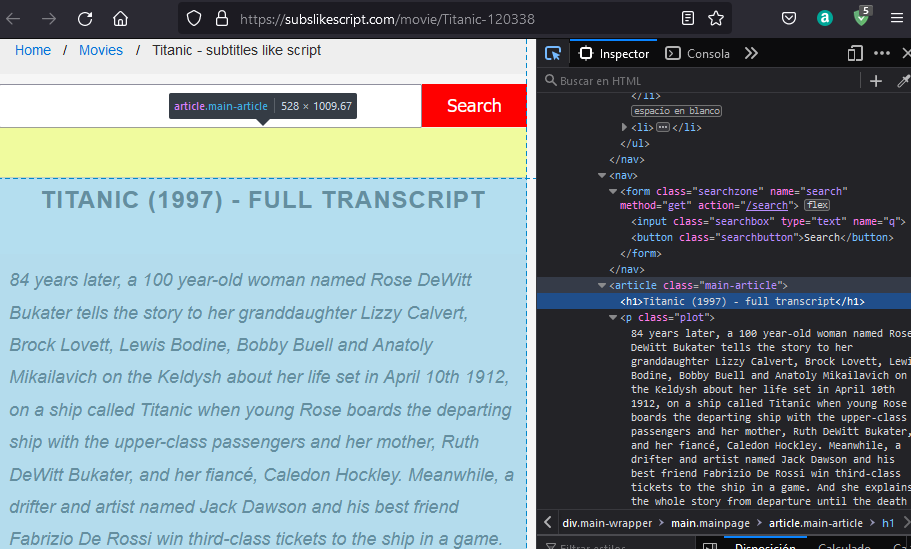

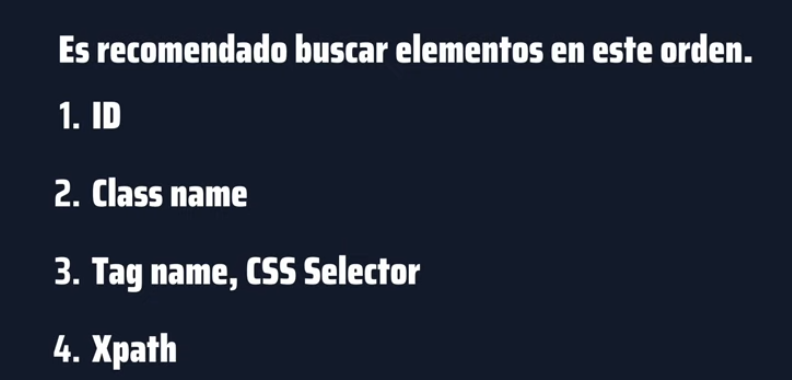

## EXTRAYENDO EL CONTENEDOR PARA FILTRAR DATOS INNECESARIOS

In [ ]:
# INGRESANDO EN LA CLASE MAIN-ARTICLE DE HTML
box = soup.find('article', class_="main-article") # para localizar 1 solo elemento 
                                                 # (pasar el nombre del tag o etiqueta, atributo o clase o parametro de la etiqueta)
                                                  # class_ con guin bajo es para diferenciar la tipo de dato clase de python con las clases de html
                                                 # para los otros atributos html no hay problemas
box

###EXTRAYENDO EL TITULO

In [ ]:
title = box.find('h1').get_text() # solo extraeremos los datos que se encuentren dentro de BOX
title

'Titanic (1997) - full transcript'

###EXTRAYENDO LA DESCRIPCION DE LA PELICULA

In [ ]:
description = box.find('p', class_="plot").get_text()
description

'84 years later, a 100 year-old woman named Rose DeWitt Bukater tells the story to her granddaughter Lizzy Calvert, Brock Lovett, Lewis Bodine, Bobby Buell and Anatoly Mikailavich on the Keldysh about her life set in April 10th 1912, on a ship called Titanic when young Rose boards the departing ship with the upper-class passengers and her mother, Ruth DeWitt Bukater, and her fiancé, Caledon Hockley. Meanwhile, a drifter and artist named Jack Dawson and his best friend Fabrizio De Rossi win third-class tickets to the ship in a game. And she explains the whole story from departure until the death of Titanic on its first and last voyage April 15th, 1912 at 2:20 in the morning.'

###EXTRAYENDO LAS CONVERSACIONES DE LA PELICULA

In [ ]:
# extraccion sin filtrar
transcript = box.find('div', class_="full-script").get_text() # datos con espacios en blanco y saltos de linea
transcript

'13 meters. You should see it.\nOkay, take her up and over the bow rail.\nMir 2, we\'re going over the bow.\nStay with us.\nOkay, quiet. We\'re rolling.\nSeeing her coming out of the\ndarkness like a ghost ship...\n...still gets me every time.\nTo see the sad ruin of the\ngreat ship sitting here...\n...where she landed at\n2:30 in the morning\nOf April 15, 1912\n...after her long fall...\n...from the world above.\nYou are so full of shit, boss.\nDive 6. Here we are again\non the deck of Titanic.\n2% miles down\n3,821 meters-\nThe pressure outside is 3% tons per square inch\nThese windows are\n9 inches thick.\nIf they go, it\'s sayonara in two microseconds.\nAll right, enough of that bullshit.\nJust put her down on the roof of\nthe officers\' quarters like yesterday.\nMir 2, we\'re landing right over the\nGrand Staircase. You guys set to launch?\nYeah, Brock. Launching Dunkin now.\nGo, Charlie.\n- All right, tether out.\n- Tether out.\nOkay, Brock, we\'re dropping\ndown along the hull.\

In [ ]:
# extraccion con algunos filtros

# eliminando espacios en blanco
transcript = box.find('div', class_="full-script").get_text(strip=True, separator=" ") #(borrar o cortar(del inicio y final), en base a que borrar " "<- equivale a espacios en blanco)
transcript

'13 meters. You should see it. Okay, take her up and over the bow rail. Mir 2, we\'re going over the bow.\nStay with us. Okay, quiet. We\'re rolling. Seeing her coming out of the\ndarkness like a ghost ship... ...still gets me every time. To see the sad ruin of the\ngreat ship sitting here... ...where she landed at\n2:30 in the morning Of April 15, 1912 ...after her long fall... ...from the world above. You are so full of shit, boss. Dive 6. Here we are again\non the deck of Titanic. 2% miles down\n3,821 meters- The pressure outside is 3% tons per square inch These windows are\n9 inches thick. If they go, it\'s sayonara in two microseconds. All right, enough of that bullshit. Just put her down on the roof of\nthe officers\' quarters like yesterday. Mir 2, we\'re landing right over the\nGrand Staircase. You guys set to launch? Yeah, Brock. Launching Dunkin now.\nGo, Charlie. - All right, tether out.\n- Tether out. Okay, Brock, we\'re dropping\ndown along the hull. Yeah, roger that- Okay

In [ ]:
# extraccion aplicando filtros adicionales

# eliminando saltos de linea y espacios en blanco
transcript = box.find('div', class_="full-script").get_text(strip=True, separator=" ").replace("\n"," ")
print(transcript)
# soup.get_text().replace("\n"," ").replace("\t"," ").replace("\s"," ")

13 meters. You should see it. Okay, take her up and over the bow rail. Mir 2, we're going over the bow. Stay with us. Okay, quiet. We're rolling. Seeing her coming out of the darkness like a ghost ship... ...still gets me every time. To see the sad ruin of the great ship sitting here... ...where she landed at 2:30 in the morning Of April 15, 1912 ...after her long fall... ...from the world above. You are so full of shit, boss. Dive 6. Here we are again on the deck of Titanic. 2% miles down 3,821 meters- The pressure outside is 3% tons per square inch These windows are 9 inches thick. If they go, it's sayonara in two microseconds. All right, enough of that bullshit. Just put her down on the roof of the officers' quarters like yesterday. Mir 2, we're landing right over the Grand Staircase. You guys set to launch? Yeah, Brock. Launching Dunkin now. Go, Charlie. - All right, tether out. - Tether out. Okay, Brock, we're dropping down along the hull. Yeah, roger that- Okay, drop down and go 

##EXPORTAR TODA LA DATA EXTRAIDA A UN ARCHIVO TXT

In [ ]:
# usar la palabra clave with
#with open('scraping_titanic.txt','w') as file: # (name_archivo.extension, "tipo read(r) o write(w)") como archivo
#  file.write(transcript)  # escribir en el archivo "file" los que haya en "transcript"

# otra forma para agregar variables dentro de las comillas es usar -> f'variable.extension' o title + '.extension'
with open(f'{title}.txt','w') as file: # (name_archivo.extension, "tipo read(r) o write(w)") como archivo
  file.write(transcript) 
# los el archivo se generará en el lugar donde tengamos el script de python